# Проект: "Статистический анализ данных сервиса аренды самокатов"


   Мне передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализирую данные и проверю некоторые гипотезы, которые могут помочь бизнесу вырасти.
   Чтобы совершать поездки по городу, пользователи сервиса аренды самокатов GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
 - без подписки
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки - 88 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
 - с подпиской Ultra
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 66 рублей;
    - стоимость старта — бесплатно.

**Описание данных**

   В основных данных есть информация о пользователях, их поездках и подписках.
   
<div style="text-align: center; font-weight: bold;">
Пользователи
</div>
   
|Столбец 1|Столбец 2|
|---------|---------|
|user_id|уникальный идентификатор пользователя|
|name|имя пользователя|
|age|возраст|
|city|город|
|subscription_type|тип подписки (free, ultra)|


<div style="text-align: center; font-weight: bold;">
Поездки
</div>

|Столбец 1|Столбец 2|
|---------|---------|
|user_id|уникальный идентификатор пользователя|
|distance|расстояние, которое пользователь проехал в текущей сессии (в метрах)|
|duration|продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»|
|date|дата совершения поездки|


<div style="text-align: center; font-weight: bold;">
Подписки
</div>

|Столбец 1|Столбец 2|
|---------|---------|
|subscription_type|тип подписки|
|minute_price|стоимость одной минуты поездки по данной подписке|
|start_ride_price|стоимость начала поездки|
|subscription_fee|стоимость ежемесячного платежа|

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

## Загрузка данных

### Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы

In [2]:
data_users = pd.read_csv('/Users/numberone/Documents/Projects/datasets/users_go.csv')
data_rides = pd.read_csv('/Users/numberone/Documents/Projects/datasets/rides_go.csv')
data_subscriptions = pd.read_csv('/Users/numberone/Documents/Projects/datasets/subscriptions_go.csv')

### Общая информация о каждом датафрейме

In [3]:
# выведем первые 10 cтрок таблицы data_users
display(data_users.head(10))

# выведем первые 10 cтрок таблицы data_rides
display(data_rides.head(10))

# выведем первые 10 cтрок таблицы data_subscriptions
data_subscriptions.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [4]:
# посмотрим общую информацию о каждом датафрейме
display(data_users.info())
display(data_rides.info())
data_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


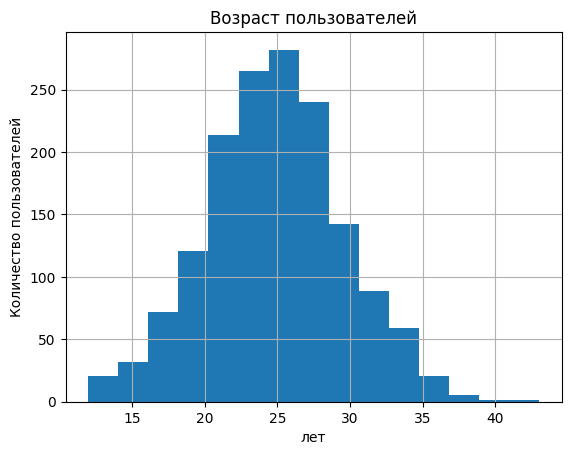

In [5]:
# построим гистограммы
plt.hist(data_users['age'], bins = 15)
plt.title('Возраст пользователей')
plt.xlabel('лет')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

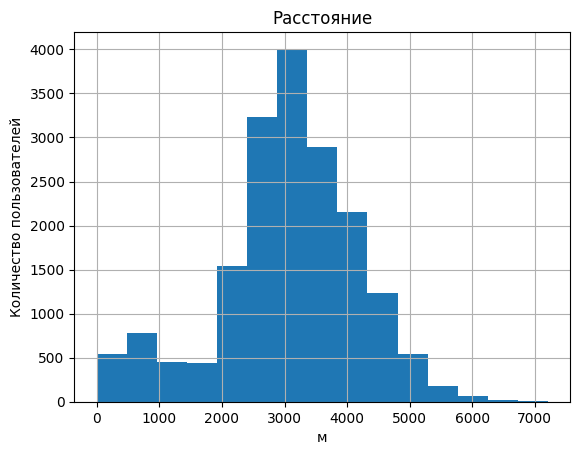

In [6]:
plt.hist(data_rides['distance'], bins=15)
plt.title('Расстояние')
plt.xlabel('м')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

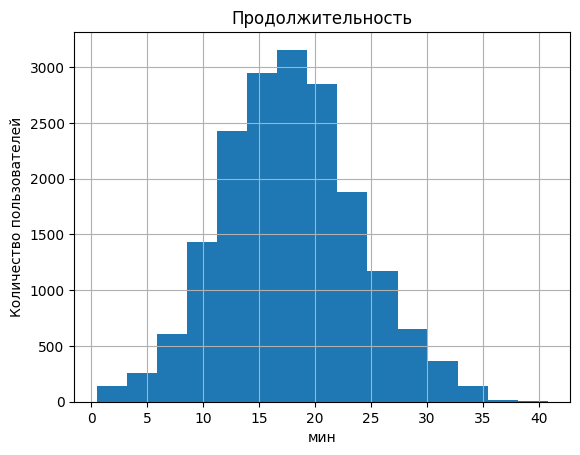

In [7]:
plt.hist(data_rides['duration'], bins=15)
plt.title('Продолжительность')
plt.xlabel('мин')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

**Вывод**
1. Видим в данных data_users 1565 строк, 5 столбцов, вес датафрейма 61,3 Kб; столбцы user_id и age имеют тип данных - int64; cтолбцы name, city и subscription_type имеют тип данных - object.
    Cогласно гистрограмме видим, что основные пользователи - возраста 20-30 лет.
2. Видим в данных data_rides 18068 строк, 4 столбца, вес датафрейма 564,8 Кб; столбцы distance и duration имеют тип данных - float64 (изменим тип данных на целочисленный int64); столбец user_id имеет тип данных - int64; столбец date имеет тип данных - object (что неккоректно,  изменим на datetime64).
    Cогласно гистограммам видим, что большинство пользователей проезжает в среднем в одной сессии 2000-4500 метров и продолжительностью в среднем - 10-27 минут.
    Столбец с наименованием user_id является общим столбцом в данных о пользователях и поездках, поэтому их можно объединить для дальнейшего анализа.
3. Видим в данных data_subscriptions 2 строки, 4 столбца, вес датафрейма 192 б; столбец subscription_type имеет тип данных - object; столбцы  minute_price, start_ride_price и subscription_fee имеют тип данных - int64.

## Предобработка данных

### Изменение типа данных

In [8]:
# преобразуем тип данных в столбце date на тип datetime64
data_rides['date'] = pd.to_datetime(data_rides['date'])

# проверим
data_rides['date'].head(10)

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
5   2021-10-09
6   2021-10-19
7   2021-11-06
8   2021-11-14
9   2021-11-22
Name: date, dtype: datetime64[ns]

In [9]:
# округлим значения в столбцах distance и duration до целых в большую сторону и изменим тип данных на целочисленный
data_rides['distance'] = np.ceil(data_rides['distance']).astype('int')
data_rides['duration'] = np.ceil(data_rides['duration']).astype('int')

In [10]:
# проверим
display(data_rides.head(10))
data_rides.info()

,user_id,distance,duration,date
0,1,4410,26,2021-01-01
1,1,2618,16,2021-01-18
2,1,755,7,2021-04-20
3,1,2695,19,2021-08-11
4,1,4029,27,2021-08-28
5,1,2771,17,2021-10-09
6,1,3040,15,2021-10-19
7,1,2843,24,2021-11-06
8,1,3413,16,2021-11-14
9,1,749,16,2021-11-22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  int64         
 2   duration  18068 non-null  int64         
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 564.8 KB


### Создание нового столбца с номером месяца на основе столбца date

In [11]:
# проверим за какой период (в годах) представлены данные в столбце date
data_rides['date'].dt.year.unique()

array([2021])

In [12]:
# данные предоставлены только за один год, следовательно ошибок не будет, если добавим номер месяца
data_rides['month'] = data_rides['date'].dt.month

# проверим
data_rides.head(10)

,user_id,distance,duration,date,month
0,1,4410,26,2021-01-01,1
1,1,2618,16,2021-01-18,1
2,1,755,7,2021-04-20,4
3,1,2695,19,2021-08-11,8
4,1,4029,27,2021-08-28,8
5,1,2771,17,2021-10-09,10
6,1,3040,15,2021-10-19,10
7,1,2843,24,2021-11-06,11
8,1,3413,16,2021-11-14,11
9,1,749,16,2021-11-22,11


### Проверка наличия пропущенных значений и дубликатов в датафреймах. Обработка


In [13]:
# посчитаем количество пропущенных значений в датафреймах
print(f'Количество пропущенных значений в data_users: {data_users.isna().sum().sum()}')
print(f'Количество пропущенных значений в data_rides: {data_rides.isna().sum().sum()}')
print(f'Количество пропущенных значений в data_subscriptions: {data_subscriptions.isna().sum().sum()}')

Количество пропущенных значений в data_users: 0
Количество пропущенных значений в data_rides: 0
Количество пропущенных значений в data_subscriptions: 0


In [14]:
# посчитаем количество явных дубликатов в датафреймах
print(f'Количество явных дубликатов в data_users: {data_users.duplicated().sum()}')
print(f'Количество явных дубликатов в data_subscriptions: {data_subscriptions.duplicated().sum()}')

Количество явных дубликатов в data_users: 31
Количество явных дубликатов в data_subscriptions: 0


In [15]:
# выведем дубликаты и их пары в отсортированном виде
data_users[data_users.duplicated(keep=False)].sort_values(by='user_id')

,user_id,name,age,city,subscription_type
15,16,Амалия,27,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
42,43,Стефания,22,Омск,ultra
1539,43,Стефания,22,Омск,ultra
1563,47,Юрий,28,Тюмень,ultra
...,...,...,...,...,...
1554,1198,Демид,29,Ростов-на-Дону,free
1558,1237,Евгения,23,Тюмень,free
1236,1237,Евгения,23,Тюмень,free
1544,1245,Регина,27,Пятигорск,free


In [16]:
# удалим явные дубликаты, оставив первую встретившуюся строку
data_users = data_users.drop_duplicates(keep='first')

# проверим
data_users.duplicated().sum()

0

**Вывод**
1. Создали новый столбец с номером месяца на основе столбца date.
2. Пропущенных данных в таблица нет.
2. Определили дубликаты и удалили их.

## Исследовательский анализ данных

### Частота встречаемости городов

In [17]:
# создадим сводную таблицу, чтобы наглядно увидеть в каких городах больше всего пользователей и 
# их процентное соотношение (округленное до целых)
(
    data_users['city'].value_counts().reset_index().rename(columns={'index': 'city', 'city': 'counts'})
    .assign(percentage=lambda x: (x['counts'] / len(data_users) * 100).round())
    .sort_values(by='counts', ascending=False)
)

,city,counts,percentage
0,Пятигорск,219,14.0
1,Екатеринбург,204,13.0
2,Ростов-на-Дону,198,13.0
3,Краснодар,193,13.0
4,Сочи,189,12.0
5,Омск,183,12.0
6,Тюмень,180,12.0
7,Москва,168,11.0


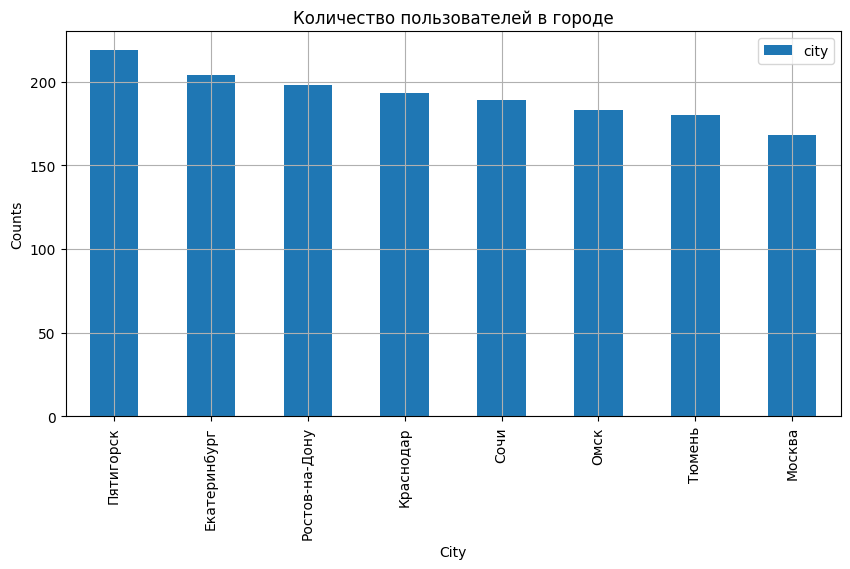

In [18]:
# построим столбчатый график
data_users['city'].value_counts().plot.bar(figsize=(10, 5), legend=True)
plt.title('Количество пользователей в городе')
plt.xlabel('City')
plt.ylabel('Counts')
plt.grid()
plt.show()

### Cоотношение пользователей с подпиской и без подписки

In [19]:
# посмотрим количество пользователей с подпиской и без
count_subscription = data_users['subscription_type'].value_counts()
print(count_subscription)

free     835
ultra    699
Name: subscription_type, dtype: int64


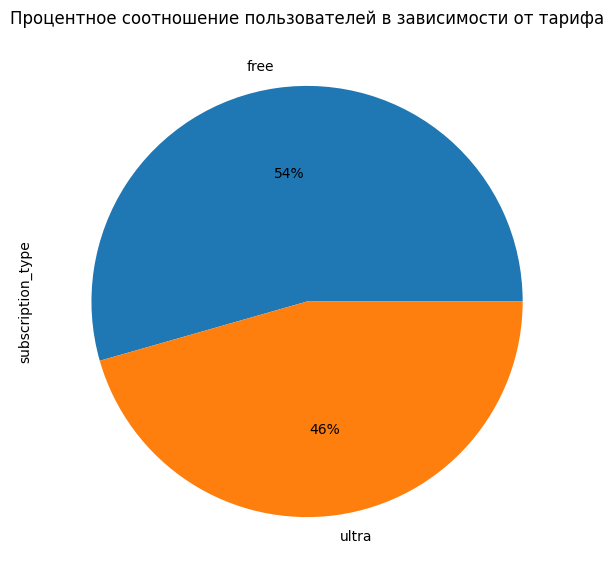

In [20]:
# построим круговую диаграмму для более наглядного отображения
data_users['subscription_type'].value_counts().plot(
    kind = 'pie', 
    autopct = '%1.0f%%', 
    figsize=(7,7),
    title = 'Процентное соотношение пользователей в зависимости от тарифа');

### Возраст пользователей

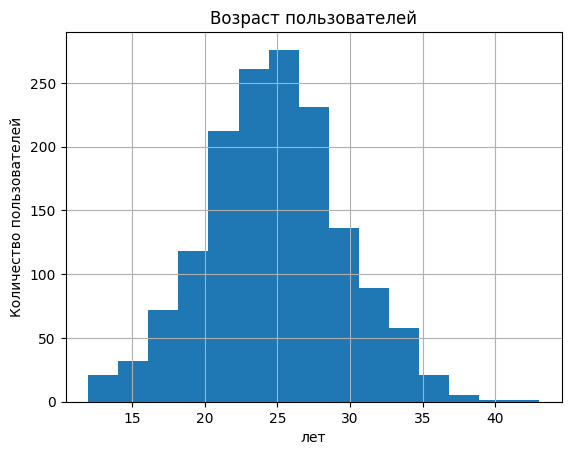

In [21]:
# построим гистограмму
plt.hist(data_users['age'], bins = 15)
plt.title('Возраст пользователей')
plt.xlabel('лет')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

In [22]:
# посмотрим описательную статистику
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

### Расстояние, которое пользователь преодолел за одну поездку

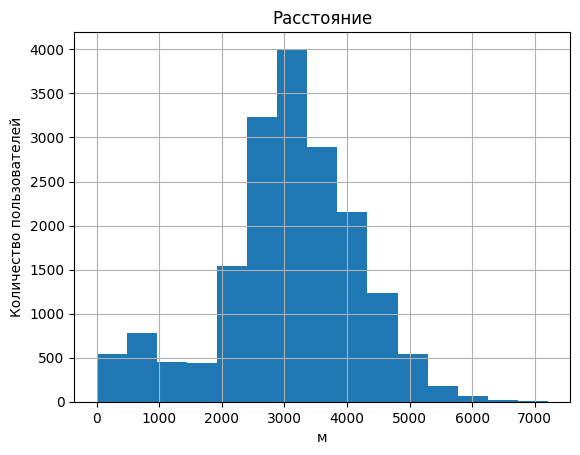

In [23]:
# построим гистограмму
plt.hist(data_rides['distance'], bins=15)
plt.title('Расстояние')
plt.xlabel('м')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

In [24]:
# посмотрим описательную статистику
data_rides['distance'].describe().round(2)

count    18068.00
mean      3071.16
std       1116.83
min          1.00
25%       2543.75
50%       3134.00
75%       3777.00
max       7212.00
Name: distance, dtype: float64

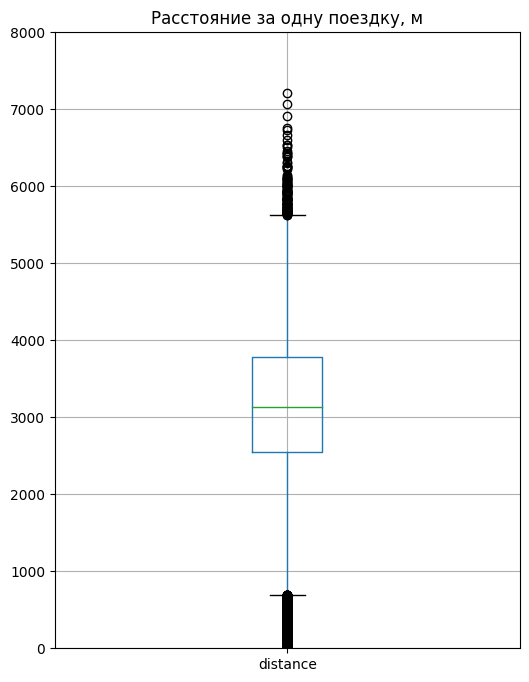

In [25]:
# также построим диаграмму размаха для данной переменной
data_rides.boxplot(column='distance', figsize=(6, 8))
plt.title('Расстояние за одну поездку, м')
plt.ylim(0, 8000)
plt.show()

### Продолжительность поездок

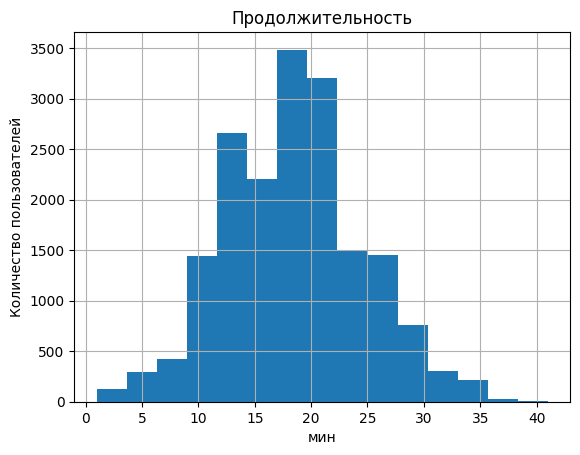

In [26]:
# построим гистограмму
plt.hist(data_rides['duration'], bins=15)
plt.title('Продолжительность')
plt.xlabel('мин')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

In [27]:
# посмотрим описательную статистику
data_rides['duration'].describe().round(2)

count    18068.00
mean        18.30
std          6.09
min          1.00
25%         14.00
50%         18.00
75%         22.00
max         41.00
Name: duration, dtype: float64

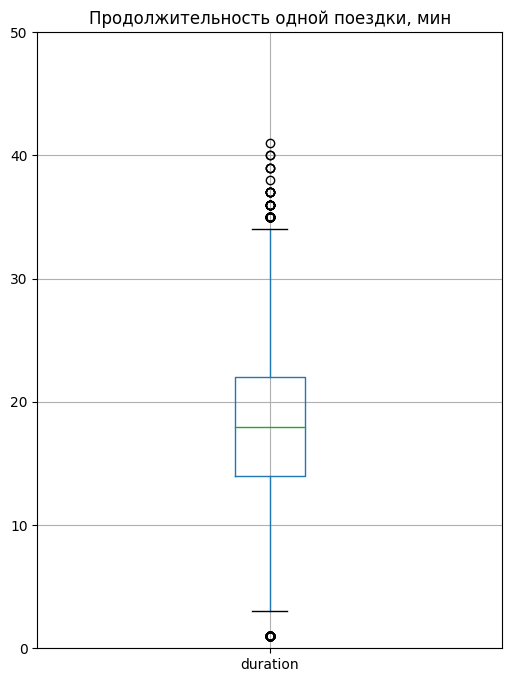

In [28]:
# также построим диаграмму размаха для данной переменной
data_rides.boxplot(column='duration', figsize=(6, 8))
plt.title('Продолжительность одной поездки, мин')
plt.ylim(0, 50)
plt.show()

**Вывод**
1. Количество пользователей по городам распределено практически одинаково, самое большое количество пользователей в Пятигорске - 219, самое наименьшее в Москве - 168. Думаю это из-за того, что Пятигорск маленький город и удобно (быстро) добраться из одной точки города в другую на самокате.
2. Пользователей с платной подпиской 46%, что меньше, чем с бесплатной - 54%.
3. В основном преобладают пользователи - 20-30 лет, самыми младшими являются - 12 лет, страшими - 43 года.
4. В основном расстояние, которое пользователь преодолевал за одну поездку - 2000-4500 метров, самая короткая дистанция - 1 метр (возможно пользователь просто передумал брать данный самокат либо он был неисправен), самая длинная дистанция - 7212 метров.
5. Продолжительность поездок в среднем составляет - 10-27 минут, минимальная - 1 минута, максимальная - 41 минута.

## Объединение данных

### Объединение данных о пользователях, поездках и подписках в один датафрейм

In [29]:
total_data = data_users.merge(data_rides, on='user_id').merge(data_subscriptions, on='subscription_type')

In [30]:
total_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4410,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2618,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,755,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2695,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4029,27,2021-08-28,8,6,0,199


In [31]:
print(f"Количество строк в data_rides: {data_rides['user_id'].count()}")
print(f"Количество строк в total_data: {total_data['user_id'].count()}")
print(f"Количество уникальных пользователей в data_users: {len(data_users['user_id'].unique())}")
print(f"Количество уникальных пользователей в total_data: {len(total_data['user_id'].unique())}")

Количество строк в data_rides: 18068
Количество строк в total_data: 18068
Количество уникальных пользователей в data_users: 1534
Количество уникальных пользователей в total_data: 1534


In [32]:
# выведем информацию о датафрейме
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  int64         
 6   duration           18068 non-null  int64         
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(3)
memory usage: 1.8+ MB


### Создание ещё двух датафреймов из датафрейма, созданного на этапе 4.1

In [33]:
# создадим датафрейм данных с пользователями с подпиской
data_ultra = total_data.loc[total_data['subscription_type'] == 'ultra']
# создадим датафрейм данных с пользователями без подписки
data_free = total_data.loc[total_data['subscription_type'] == 'free']

In [34]:
# выведем датафреймы
display(data_ultra.head())
data_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4410,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2618,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,755,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2695,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4029,27,2021-08-28,8,6,0,199


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2516,15,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,847,17,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4005,21,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1206,10,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3048,18,2021-02-14,2,8,50,0


In [35]:
# выведем информацию о датафреймах
data_ultra.info()
data_free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   int64         
 6   duration           6500 non-null   int64         
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int64         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), int64(8), object(3)
memory usage: 660.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11

### Визуализация

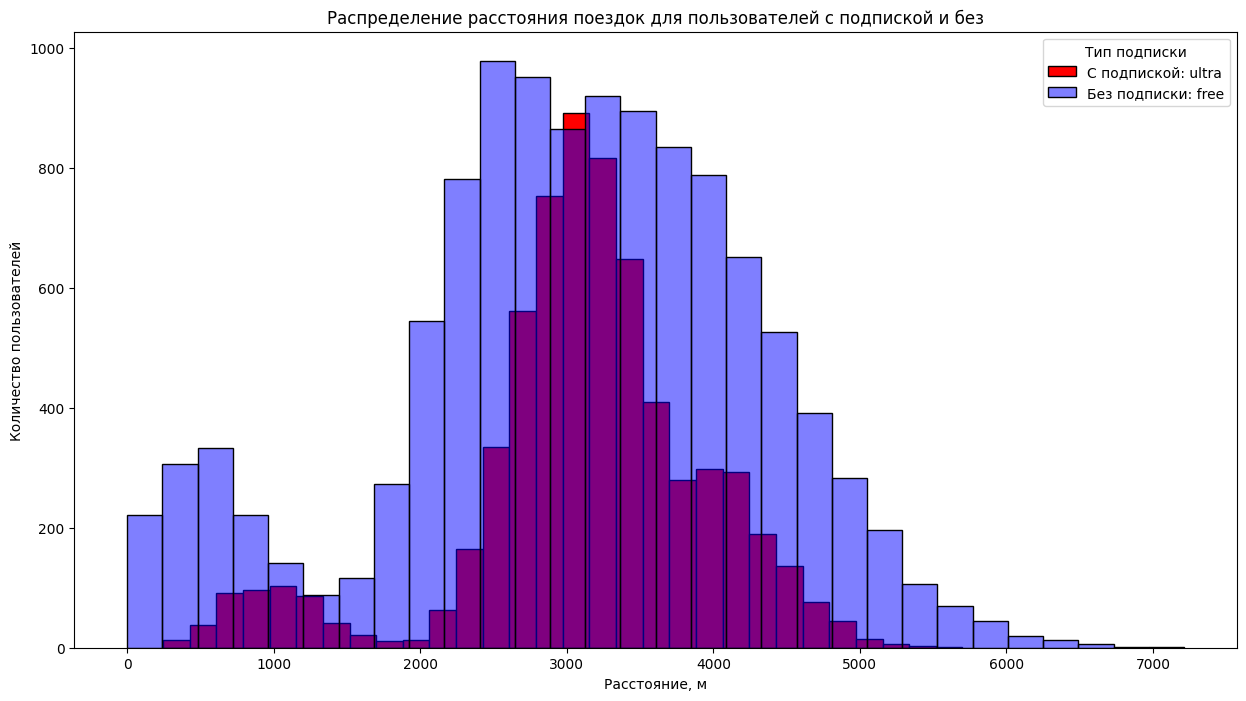

In [36]:
# построим гистограмму продолжительности поездок пользователей с подпиской и без
plt.figure(figsize=(15, 8))
sns.histplot(data_ultra['distance'], bins=30, color='red', alpha=1, label='С подпиской: ultra')
sns.histplot(data_free['distance'], bins=30, color='blue',alpha=0.5, label='Без подписки: free')
plt.title('Распределение расстояния поездок для пользователей с подпиской и без')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')
plt.legend(title='Тип подписки')
plt.show()

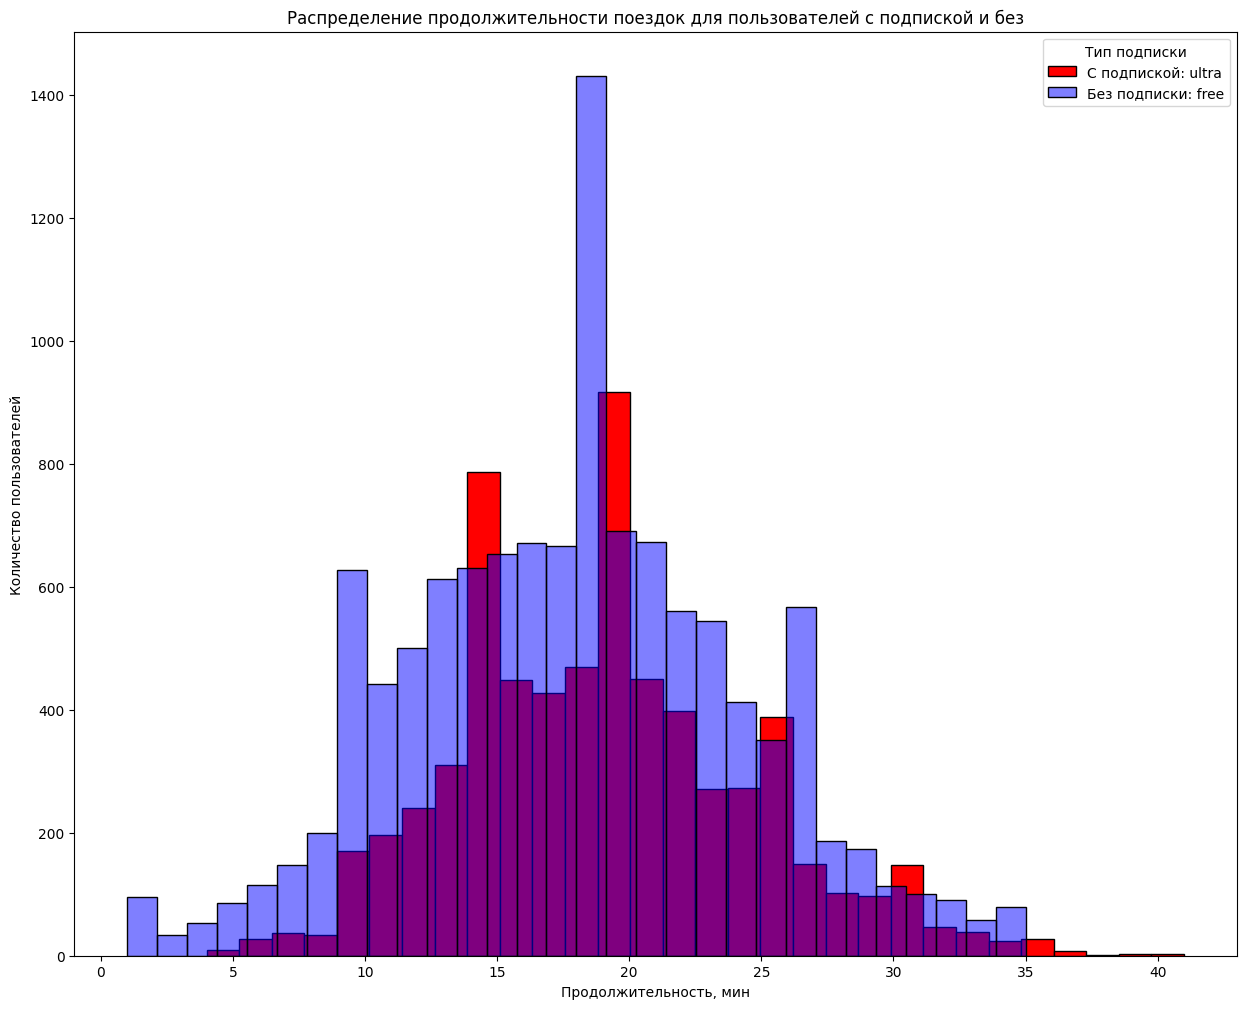

In [37]:
# построим гистограмму распределения расстояния, которое пользователь преодолел за одну поездку с подпиской и без
plt.figure(figsize=(15, 12))
sns.histplot(data_ultra['duration'], bins=30, color='red', alpha=1, label='С подпиской: ultra')
sns.histplot(data_free['duration'], bins=30, color='blue',alpha=0.5, label='Без подписки: free')
plt.title('Распределение продолжительности поездок для пользователей с подпиской и без')
plt.xlabel('Продолжительность, мин')
plt.ylabel('Количество пользователей')
plt.legend(title='Тип подписки')
plt.show()

**Вывод**
1. Были созданы три датафрейма - общий и два датафрейма для пользователей с подпиской и без. 
2. Согласно гистограмме (Распределение расстояния поездок для пользователей с подпиской и без) видим, что у пользователей без подписки больше коротких поездок и максимальная дальность поездки выше, чем у платных пользователей. Данные с подпиской имеют также 2 пика как и у данных без подписки, но первый пик при этом не так ярко выражен как у пользователей без подписки.Если рассматривать второй пик, то у пользователей с подпиской он более пикообразный, чем у пользователей без, что свидетельствует о меньшей мере разброса вокруг среднее, если рассматривать только второй пик.
2. Согласно гистограмме(Распределение продолжительности поездок для пользователей с подпиской и без)видим, что для пользователей с подпиской "ultra" характерно более высокое количество длинных поездок - до 40 минут и более. Короткие поездки начинаются с 4 минут, а без подписки с 1 минуты. Продолжительность поездок при использовании подписки 'free' немного меньше по всем показателям, чем при использовании 'ultra'. Пик поездок ориентировочно в обоих случаях приходится на 18-20 минут.

## Подсчёт выручки

### Создание датафрейма с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4

In [38]:
# сгруппируем данные по пользователям, месяцам и типам подписок
total_data_month = total_data.groupby(
    ['user_id', 'name', 'age', 'city', 'subscription_type', 'month', 'minute_price', 'start_ride_price', 'subscription_fee']
                          ).agg({
    'distance': 'sum',
    'duration': 'sum', 
    'date': 'count'
}).reset_index()


# переименуем столбцы
total_data_month.rename(columns={
    'distance': 'total_distance',
    'duration': 'total_duration',
    'date': 'trips_count'
}, inplace=True)

# выведем первые строки агрегированного датафрейма
total_data_month.head(10)

,user_id,name,age,city,subscription_type,month,minute_price,start_ride_price,subscription_fee,total_distance,total_duration,trips_count
0,1,Кира,22,Тюмень,ultra,1,6,0,199,7028,42,2
1,1,Кира,22,Тюмень,ultra,4,6,0,199,755,7,1
2,1,Кира,22,Тюмень,ultra,8,6,0,199,6724,46,2
3,1,Кира,22,Тюмень,ultra,10,6,0,199,5811,32,2
4,1,Кира,22,Тюмень,ultra,11,6,0,199,7005,56,3
5,1,Кира,22,Тюмень,ultra,12,6,0,199,6753,28,2
6,2,Станислав,31,Омск,ultra,3,6,0,199,10190,63,3
7,2,Станислав,31,Омск,ultra,4,6,0,199,6165,40,2
8,2,Станислав,31,Омск,ultra,6,6,0,199,3256,14,1
9,2,Станислав,31,Омск,ultra,7,6,0,199,6781,48,2


In [39]:
# проверим пропуски в сводной таблице
total_data_month.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
total_distance       0
total_duration       0
trips_count          0
dtype: int64

### В этот же датафрейм добавление столбца с помесячной выручкой, которую принёс каждый пользователь

In [40]:
# расчет выручки в зависимости от типа подписки
total_data_month['proceeds'] = (
    total_data_month['start_ride_price'] * total_data_month['trips_count'] + 
    total_data_month['minute_price'] * total_data_month['total_duration'] + total_data_month['subscription_fee']
                                           )
# выведем первые строки датафрейма
total_data_month.head(10)

,user_id,name,age,city,subscription_type,month,minute_price,start_ride_price,subscription_fee,total_distance,total_duration,trips_count,proceeds
0,1,Кира,22,Тюмень,ultra,1,6,0,199,7028,42,2,451
1,1,Кира,22,Тюмень,ultra,4,6,0,199,755,7,1,241
2,1,Кира,22,Тюмень,ultra,8,6,0,199,6724,46,2,475
3,1,Кира,22,Тюмень,ultra,10,6,0,199,5811,32,2,391
4,1,Кира,22,Тюмень,ultra,11,6,0,199,7005,56,3,535
5,1,Кира,22,Тюмень,ultra,12,6,0,199,6753,28,2,367
6,2,Станислав,31,Омск,ultra,3,6,0,199,10190,63,3,577
7,2,Станислав,31,Омск,ultra,4,6,0,199,6165,40,2,439
8,2,Станислав,31,Омск,ultra,6,6,0,199,3256,14,1,283
9,2,Станислав,31,Омск,ultra,7,6,0,199,6781,48,2,487


**Вывод**
    
Создали новый датафрейм с агрегированными данными total_data_month на основе датафрейма с объединенными данными total_data. Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также добавили столбец с помесячной выручкой, которую принес каждый пользователь.

## Проверка гипотез

### Проверим, тратят ли пользователи с подпиской больше времени на поездки

Проверим гипотезу: пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе.

H_0: Время пользователей на подписке ultra равно времени пользователей на подписке free

H_1: Время пользователей на подписке ultra больше времени пользователей на подписке free

alpha = 0.05

In [41]:
ultra_duration = data_ultra['duration'] 
free_duration = data_free['duration']
alpha = 0.05
results = st.ttest_ind(ultra_duration, 
                       free_duration,
                       alternative = 'greater')
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

2.4959453720736625e-34
Отвергаем нулевую гипотезу


### Проверим, можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

Проверим гипотезу: пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку.

H_0: Расстояние (distance) пользователей на подписке ultra = 3130 метров

H_1: Расстояние (distance) пользователей на подписке ultra больше оптимального (3130 метров)

alpha = 0.05

In [42]:
ultra_distance = data_ultra['distance']
interested_value = 3130
alpha = 0.05
results = st.ttest_1samp(
    ultra_distance, 
    interested_value,
    alternative='greater')
print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.9120422337080507
Не удалось отвергнуть нулевую гипотезу


### Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

Проверим гипотезу: помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки

H_0: Выручка пользователей на подписке ultra равна выручке пользователей на подписке free

H_1: Выручка пользователей на подписке ultra > выручки пользователей на подписке free

alpha = 0.05

In [43]:
ultra_proceeds = total_data_month.loc[total_data.subscription_type == 'ultra', 'proceeds'] 
free_proceeds = total_data_month.loc[total_data.subscription_type == 'free', 'proceeds'] 
alpha = 0.05
results = st.ttest_ind(ultra_proceeds, 
                       free_proceeds,
                       alternative = 'greater')
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

3.819490444237055e-17
Отвергаем нулевую гипотезу


### Проверим, уменьшится ли количесто обращений в техподдержку после обновления серверов

Необходимо использовать гипотезу о равенстве средних для зависимых (парных) выборок. Гипотезы будут сформулированы так:

H_0: Различия между количеством обращений до и после обновления отсутствуют или что количество обращений после обновления больше или равно, чем до: μ2 >= μ1

H_1:Количество обращений после обновления меньше, чем до обновления.
</div> μ2 < μ1

,где μ1 и μ2 - средние значения количество обращений в техподдержку до и после изменения.
Метод, который нужно использовать при сравнении: scipy.stats.ttest_rel(alternative='less')

**Вывод**

Проверили все гипотезы, которые были даны в задании.

## Общий вывод

1. Цель проекта - это анализ данных и проверка некоторых гипотез, которые могут помочь бизнесу вырасти.


2. В пункте Загрузка и предобработка данных было определено: 
    - В данных отсутствуют пропуски.
    - Переменная date была приведена к нужному типу данных datetime.
    - Округлили значения в столбцах distance и duration до целых в большую сторону и изменим тип данных на целочисленный.
    - Создали новый столбец с номером месяца на основе столбца date.
    - В датасете data_users имелись дубликаты, которые были обработаны.


3. Исследовательский анализ данных помог выяснить:
    - Количество пользователей по городам распределено практически одинаково, самое большое количество пользователей в Пятигорске - 219, самое наименьшее в Москве - 168. Думаю это из-за того, что Пятигорск маленький город и удобно (быстро) добраться из одной точки города в другую на самокате.
    - Пользователей с платной подпиской 46%, что меньше, чем с бесплатной - 54%.
    - В основном преобладают пользователи - 20-30 лет, самыми младшими являются - 12 лет, страшими - 43 года.
    - В основном расстояние, которое пользователь преодолевал за одну поездку - 2000-4500 метров, самая короткая дистанция - 1 метр (возможно пользователь просто передумал брать данный самокат либо он был неисправен), самая длинная дистанция - 7212 метров.
    - Продолжительность поездок в среднем составляет - 10-27 минут, минимальная - 1 минута, максимальная - 41 минута.


4. В пункте Объединение данных было выполнено и определено:
    - Были созданы три датафрейма - общий и два датафрейма для пользователей с подпиской и без.
    - Согласно гистограмме (Распределение расстояния поездок для пользователей с подпиской и без) увидели, что у пользователей без подписки больше коротких поездок и максимальная дальность поездки выше, чем у платных пользователей. 
    - Данные с подпиской имеют также 2 пика как и у данных без подписки, но первый пик при этом не так ярко выражен как у пользователей без подписки. Если рассматривать второй пик, то у пользователей с подпиской он более пикообразный, чем у пользователей без, что свидетельствует о меньшей мере разброса вокруг среднее, если рассматривать только второй пик.
    - Согласно гистограмме(Распределение продолжительности поездок для пользователей с подпиской и без)увидели, что для пользователей с подпиской "ultra" характерно более высокое количество длинных поездок - до 40 минут и более. Короткие поездки начинаются с 4 минут, а без подписки с 1 минуты. Продолжительность поездок при использовании подписки 'free' немного меньше по всем показателям, чем при использовании 'ultra'. Пик поездок ориентировочно в обоих случаях приходится на 18-20 минут.


5. В пункте Подсчет выручки создали новый датафрейм с агрегированными данными total_data_month на основе датафрейма с объединенными данными total_data. Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также добавили столбец с помесячной выручкой, которую принес каждый пользователь.


6. Проверили гипотезы:
    - Время пользователей на подписке ultra равно времени пользователей на подписке free - была отвергнута.
    - Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку - не была отвергнута.
    - Выручка пользователей на подписке ultra равна выручке пользователей на подписке free - была отвергнута.
    
    
7. Также можем дать рекомендации рекламному отделу, что необходимо продвигать платный вид подписки, тк он приносит больше выручки ( выяснили это при проверки гипотезы в пункте 6.3).
    
    Спасибо за внимание!